# 深度學習 - 樣形識別

In [40]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [41]:
(xr,yr), (xt,yt)= keras.datasets.mnist.load_data()

In [42]:
xr.shape, yr.shape, xt.shape, yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [43]:
x= xr[17]
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 11203229 32  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 26 47 47 30 95254215 13  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 45154185185223253253133175255188 19  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0110253253253246161228253253254 92  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0128245253158137 21  0 48233253233  8  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0139254223 25  0  0 36170254244106  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 55212253161 11 26178253236113  0  

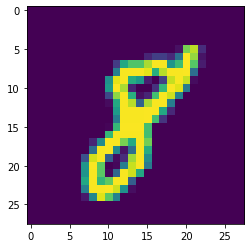

In [44]:
import matplotlib.pyplot as pl
pl.imshow(x)

In [45]:
xr1= xr.reshape(-1, 28*28) 
xt1= xt.reshape(-1, 28*28) 

In [46]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100),    
    keras.layers.Dense(10)   
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


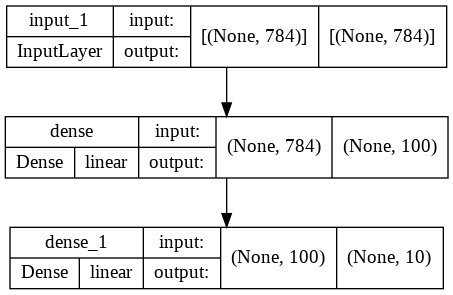

In [47]:
aModel.summary()

keras.utils.plot_model(aModel, 
    show_shapes= True, 
    show_layer_activations= True)

In [62]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100, activation= 'sigmoid'),    
    keras.layers.Dense(10,  activation= 'sigmoid')
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

aModel.fit(xr1, yr, 
           epochs= 20, 
           batch_size= 128)

aModel.evaluate(xt1, yt)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5691 - accuracy: 0.8653
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2625 - accuracy: 0.9249
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2106 - accuracy: 0.9400
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1774 - accuracy: 0.9498
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1540 - accuracy: 0.9560
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1359 - accuracy: 0.9613
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1218 - accuracy: 0.9651
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1097 - accuracy: 0.9686
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0997 - accuracy: 0.9720
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0911 - accuracy: 0.9745

[0.0776667520403862, 0.9761000275611877]